In [236]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [237]:
os.chdir("C:/Users/Señor Topo/Desktop/bootcamp_ds/Proyecto final/ML_Marketing_grupo_3/data")

In [238]:
df = pd.read_csv("user_web_final.csv", index_col = 0)
df

,Date,Users,year,month,day,day of week,weekend,season,festivo
0,2020-01-01,13,2020,1,1,2,0,winter,1
1,2020-01-02,17,2020,1,2,3,0,winter,0
2,2020-01-03,13,2020,1,3,4,0,winter,0
3,2020-01-04,4,2020,1,4,5,1,winter,0
4,2020-01-05,10,2020,1,5,6,1,winter,0
...,...,...,...,...,...,...,...,...,...
846,2022-04-26,63,2022,4,26,1,0,spring,0
847,2022-04-27,64,2022,4,27,2,0,spring,0
848,2022-04-28,46,2022,4,28,3,0,spring,0
849,2022-04-29,29,2022,4,29,4,0,spring,0


## Comprobamos que na hayan NaN ni Nulls:

In [239]:
total_nan_values = df.isnull().sum().sum()
print (total_nan_values)

0


In [240]:
check_for_nan = df.isnull().any().any()
check_for_nan

False

In [241]:
df.columns

Index(['Date', 'Users', 'year', 'month', 'day', 'day of week', 'weekend',
       'season', 'festivo'],
      dtype='object')

## Eliminamos columnas que no necesitamos:

In [242]:
df = df.drop(['Date'], axis=1)

## Convertimos la columnas "season" a númerica:

In [243]:
df['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [244]:
df['season']=df['season'].str.replace('winter',"1")
df['season']=df['season'].str.replace('spring',"2")
df['season']=df['season'].str.replace('summer',"3")
df['season']=df['season'].str.replace('autumn',"4")

df['season'] = pd.to_numeric(df['season'])

In [245]:
df

,Users,year,month,day,day of week,weekend,season,festivo
0,13,2020,1,1,2,0,1,1
1,17,2020,1,2,3,0,1,0
2,13,2020,1,3,4,0,1,0
3,4,2020,1,4,5,1,1,0
4,10,2020,1,5,6,1,1,0
...,...,...,...,...,...,...,...,...
846,63,2022,4,26,1,0,2,0
847,64,2022,4,27,2,0,2,0
848,46,2022,4,28,3,0,2,0
849,29,2022,4,29,4,0,2,0


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Users        851 non-null    int64
 1   year         851 non-null    int64
 2   month        851 non-null    int64
 3   day          851 non-null    int64
 4   day of week  851 non-null    int64
 5   weekend      851 non-null    int64
 6   season       851 non-null    int64
 7   festivo      851 non-null    int64
dtypes: int64(8)
memory usage: 59.8 KB


In [247]:
df.columns

Index(['Users', 'year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo'],
      dtype='object')

<AxesSubplot:>

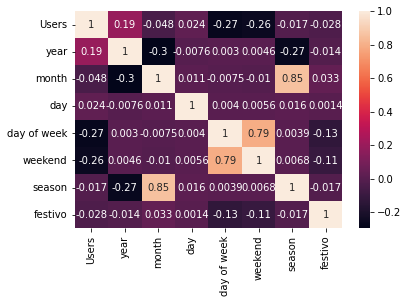

In [248]:
sns.heatmap(df.corr(), annot = True)

In [249]:
df.columns

Index(['Users', 'year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo'],
      dtype='object')

## Escalamos los datos:

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = ['Users', 'year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo'])
df_scaled


,Users,year,month,day,day of week,weekend,season,festivo
0,-1.117423,-1.018181,-1.408981,-1.673458,-0.501913,-0.632195,-1.192095,6.000000
1,-0.946998,-1.018181,-1.408981,-1.559684,-0.001177,-0.632195,-1.192095,-0.166667
2,-1.117423,-1.018181,-1.408981,-1.445910,0.499560,-0.632195,-1.192095,-0.166667
3,-1.500878,-1.018181,-1.408981,-1.332135,1.000296,1.581789,-1.192095,-0.166667
4,-1.245241,-1.018181,-1.408981,-1.218361,1.501032,1.581789,-1.192095,-0.166667
...,...,...,...,...,...,...,...,...
846,1.012885,1.846189,-0.555570,1.170899,-1.002650,-0.632195,-0.298286,-0.166667
847,1.055491,1.846189,-0.555570,1.284674,-0.501913,-0.632195,-0.298286,-0.166667
848,0.288580,1.846189,-0.555570,1.398448,-0.001177,-0.632195,-0.298286,-0.166667
849,-0.435724,1.846189,-0.555570,1.512222,0.499560,-0.632195,-0.298286,-0.166667


## Separamos la variable target:

In [252]:
X = df[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']]

y = df['Users']

## Dividimos los daton train y test:

In [253]:
X_train = df[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']][:-150]
X_test = df[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']][-150:]

y_train = df["Users"][:-150]
y_test = df["Users"][-150:]


## Creamos modelo de regresión lineal:

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error

In [255]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

predictions = modelo.predict(X_test)

## Evaluamos el modelo:

In [256]:
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MAPE: ", mean_absolute_percentage_error(y_test,predictions))
print("MSE: ", mean_squared_error(y_test,predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,predictions)))

MAE:  9.321082391025799
MAPE:  0.20545279813255274
MSE:  155.0532722690623
RMSE:  12.452038880001231


In [257]:
from sklearn import metrics

modelo.score(X_test, y_test)

0.32344208529440543

c:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


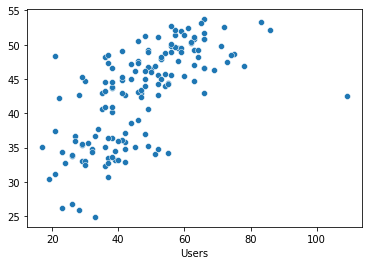

In [258]:
sns.scatterplot(y_test, predictions);

c:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


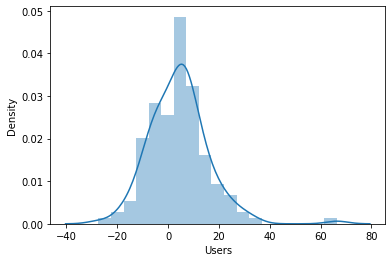

In [259]:
sns.distplot((y_test - predictions));

## Creamos modelo de regresión polinómica:

In [260]:
from sklearn.preprocessing import PolynomialFeatures

In [262]:
X = df_scaled[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']]

y = df_scaled['Users']

In [263]:
X_train = df_scaled[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']][:-150]
X_test = df_scaled[['year', 'month', 'day', 'day of week', 'weekend', 'season',
       'festivo']][-150:]

y_train = df_scaled["Users"][:-150]
y_test = df_scaled["Users"][-150:]

In [264]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train)
X_poly_train = poly_reg.transform(X_train) 

pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [266]:
print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_poly_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_poly_train)))
print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_poly_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_poly_train))))
print('R2 score train', r2_score(y_train, pol_reg.predict(X_poly_train)))

MAE train 0.3476086221816106
MAPE train 1.4811015380901198
MSE train 0.22466826473513837
RMSE train 0.47399184036767805
R2 score train 0.7950704488680602


In [267]:
X_poly_test = poly_reg.transform(X_test)

In [268]:
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_poly_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg.predict(X_poly_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_poly_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_poly_test))))
print('R2 score test', r2_score(y_test, pol_reg.predict(X_poly_test)))

MAE test 32159223622.9469
MAPE test 199258697766.14908
MSE test 6.120794014457975e+21
RMSE test 78235503541.92126
R2 score test -1.4712527349447068e+22
